### Цель работы

Изучение связи между признаками двумерного набора данных, визуализация данных.

### Задание
1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными ветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.

### Описание предметной области

**Вариант 8**

Набор данных: ```drivers2.csv```

Датасет содержит информацию о поездках в такси:
- 1 Дата и время начала (start_date)
- 2 Дата и время окончания (end_date)
- 3 Категория (category)
- 4 Место начала (можно не проверять данный столбец на наличие неявных
дубликатов) (start)
- 5 Место окончания (можно не проверять данный столбец на наличие неявных
дубликатов) (stop)
- 6 Пройденные мили (miles)
- 7 Цель поездки (purpose)
- 8 Время поездки в минутах (time)
- 9 Скорость в пути (speed)
- 10 Цена поездки (price)

# Ход работы

## 1. Загрузка датасета и его обзор.

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('drivers2.csv', sep = ',')

In [131]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,64.500000,638.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0,85.200000,714.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,8.000000,787.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0,24.900000,1838.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0,36.666667,2365.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1099 non-null   object 
 1   END_DATE*    1099 non-null   object 
 2   CATEGORY*    1099 non-null   object 
 3   START*       1099 non-null   object 
 4   STOP*        1099 non-null   object 
 5   MILES*       1099 non-null   float64
 6   PURPOSE*     598 non-null    object 
 7   time         1099 non-null   float64
 8   speed        1099 non-null   float64
 9   price        1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


В наборе данных 1099 строк и 10 столбцов; \
Типы данных: object (или же строковый), float64; \
Пропуски найдены: ```PURPOSE``` (501 шт.)

In [133]:
df.describe()

/home/focus/Documents/github/data_analysis/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,MILES*,time,speed,price
count,1099.000000,1099.000000,1099.000000,1099.000000
mean,10.803094,23.300273,inf,2085.929936
std,22.044580,27.745836,NaN,2084.368402
min,0.500000,0.000000,3.917355,337.000000
25%,2.900000,10.000000,15.346667,1087.000000
50%,6.000000,16.000000,21.333333,1539.000000
75%,10.500000,27.000000,28.915033,2365.500000
max,310.300000,336.000000,inf,25569.000000


По числовым признакам датасета можно сделать следующие выводы.

Большинство поездок — относительно короткие: медианное расстояние составляет 6 миль, а 75% поездок не превышают 10,5 миль. Однако наблюдается значительный разброс — от 0,5 мили до 310,3 миль, что указывает на наличие как локальных перемещений, так и редких междугородних или аномально длинных поездок.

Время поездок также варьируется сильно: медиана — 16 минут, но максимальное значение достигает 336 минут (более 5,5 часов), что может свидетельствовать о пробках, длительных маршрутах или технических особенностях сбора данных.

Средняя скорость содержит бесконечные значения (inf), что, вероятно, связано с поездками нулевой продолжительности (время = 0 при ненулевом расстоянии), что указывает на ошибки в данных или особенности их регистрации. Исключая такие аномалии, типичная скорость (25–75 перцентили) лежит в диапазоне 15–29 миль/ч, что соответствует городскому трафику.

Стоимость поездок в среднем составляет около 2086 рублей, при этом медиана — 1539 рублей, что говорит о наличии дорогих выбросов, сильно влияющих на среднее. Минимальная цена — 337 рублей, а максимальная — 25 569 рублей, что подчёркивает высокую вариативность тарифов. Разброс цен значителен (стандартное отклонение ~2084), и, как и в случае с расстоянием и временем, свидетельствует о смеси типичных коротких поездок и редких, но очень дорогих заказов (возможно, премиум-класс, ночные тарифы или межгород).

В целом, датасет отражает разнообразную структуру поездок: преобладают недорогие и короткие заказы, но присутствуют и экстремальные значения, которые требуют внимания при анализе и предобработке данных.

## 1. Предобработка датасета

Исходя из обзора датасета, были найдены пропуски в ```PURPOSE*```, аномалии (есть бесконечные значения (inf) и стандартное отклонение NaN) в ```speed```. Это стоит исправить, а также привести нейминг к единому стилю

In [134]:
df_cleaned = df.copy()

> Создана копия df в виде df_cleaned, чтобы сохранить оригинальные данные от изменений

#### Обработка пропусков

In [135]:
df_cleaned.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       501
time             0
speed            0
price            0
dtype: int64

Здесь:
- isnull() - определяет, какие значения являются NaN
- sum() - суммирует количество True (или же пропусков) для каждого столбца

Найден 501 пропуск в столбце ```PURPOSE*```.

> Мы не можем удалить пропуски, так как их количество составляет практически половину от выборки, что существенно повляет на анализ. Так как этот столбец представляет собой "цель поездки" и его тип object, то мы можем заполнить прпоуски, за счёт того, что указать цель поездки как "Not Specified" или же "Цель не указана"

In [136]:
df_cleaned['PURPOSE*'] = df['PURPOSE*'].fillna('Not Specified')
df_cleaned.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
time           0
speed          0
price          0
dtype: int64

Пропуски были запоолнены. Больше пропущенных значений не найдено

#### Проведем анализ причин аномалий и устранение этих аномалий

In [137]:
print(f"Бесконечные значения: {(df_cleaned['speed'] == float('inf')).sum()}")
print(f"NaN значения: {df_cleaned['speed'].isna().sum()}")

Бесконечные значения: 4
NaN значения: 0


> У нас всего 4 строки с бесконечной скоростью из 1099. Это составляет примерно 0.36% от всего датасета. Удаление такого малого количества данных практически не повлияет на статистическую значимость выборки.

In [138]:
inf_speed_rows = df_cleaned[df_cleaned['speed'] == float('inf')]
(inf_speed_rows[['START_DATE*', 'END_DATE*', 'MILES*', 'time', 'speed']])

,START_DATE*,END_DATE*,MILES*,time,speed
750,2016-09-06 17:49:00,2016-09-06 17:49:00,69.1,0.0,inf
760,2016-09-16 07:08:00,2016-09-16 07:08:00,1.6,0.0,inf
797,2016-10-08 15:03:00,2016-10-08 15:03:00,3.6,0.0,inf
806,2016-10-13 13:02:00,2016-10-13 13:02:00,0.7,0.0,inf


In [139]:
inf_analysis = inf_speed_rows.copy()
inf_analysis['calculated_speed'] = (inf_analysis['MILES*'] / inf_analysis['time']) * 60

(inf_analysis[['MILES*', 'time', 'speed', 'calculated_speed']])

,MILES*,time,speed,calculated_speed
750,69.1,0.0,inf,inf
760,1.6,0.0,inf,inf
797,3.6,0.0,inf,inf
806,0.7,0.0,inf,inf


In [140]:
print("Время поездок с inf скоростью:")
print(inf_speed_rows['time'].value_counts())

Время поездок с inf скоростью:
time
0.0    4
Name: count, dtype: int64


Я сделал следующее: отфильтровал датафрейм, оставляя только строки где speed равно бесконечности, и вывел ключевые колонки для анализа.

Бесконечная скорость появляется, когда time = 0, а MILES* > 0. Если time = 0, получаем деление на ноль, отсюда и бесконечность. Это явная ошибка в данных.

> Отсюда мы делаем точный вывод, что нам надо удалять данные, а не заменять их, так как при time = 0, мы заменим невозможное значение на правдоподобное, а это исказит данные и скрывает факт ошибки

In [141]:
df_cleaned = df_cleaned[df_cleaned['speed'] != float('inf')].reset_index(drop=True)

print(f"Бесконечные значения: {(df_cleaned['speed'] == float('inf')).sum()}")
print(f"Минимальная скорость: {df_cleaned['speed'].min():.2f}")
print(f"Максимальная скорость: {df_cleaned['speed'].max():.2f}")
print(f"Измененный размер датасета: {len(df_cleaned)}")

Бесконечные значения: 0
Минимальная скорость: 3.92
Максимальная скорость: 906.00
Измененный размер датасета: 1095


Здесь для удаления создаётся маска, где df_cleaned['speed'] != float('inf') и датафрейм df_cleaned фильтруется по этой маске, оставляя только строки, где маска равна True. Затем идёт вызов .reset_index(drop=True), которые перестраивает индексы строк.

По output делаем следующие выводы:
- Бесконечные значения: 0. В нашем очищенном датасете больше НЕТ строк с бесконечной скоростью
- Минимальная скорость: 3.92. Такая скорость соответствует очень медленному движению (как при парковке или движении в пробке), что физически возможно
- Максимальная скорость: 906.00. Это физически невозможно, но я оставил подобные выбросы для анализа через boxplot
- Измененный размер датасета: 1095. Это подтверждает, что мы удалили те 4 строки с бесконечной скоростью, которые нашли ранее

#### Приведем нейминг к единому стилю и уточним некоторые наименования

In [142]:
original_columns = df_cleaned.columns.tolist()
(original_columns)

['START_DATE*',
 'END_DATE*',
 'CATEGORY*',
 'START*',
 'STOP*',
 'MILES*',
 'PURPOSE*',
 'time',
 'speed',
 'price']

tolist() - преобразует названия колонок в список для удобного просмотра

In [143]:
df_cleaned = df_cleaned.rename(columns={
    'START_DATE*': 'start_datetime',
    'END_DATE*': 'end_datetime', 
    'CATEGORY*': 'category',
    'START*': 'start_location',
    'STOP*': 'stop_location',
    'MILES*': 'miles',
    'PURPOSE*': 'purpose',
    'time': 'time_minutes',
    'speed': 'speed_mph',
    'price': 'price'
})

(df_cleaned.columns.tolist())

['start_datetime',
 'end_datetime',
 'category',
 'start_location',
 'stop_location',
 'miles',
 'purpose',
 'time_minutes',
 'speed_mph',
 'price']

rename(columns={...}) - переименовывает указанные колонки. Используем under_score стиль (snake_case) для всех названий.

Мы получили следующее: единый стиль under_score (snake_case), убраны специальные символы (*), более описательные названия

#### Поиск явных и неявных дубликатов

**Явные дубликаты**

df_cleaned.duplicated().sum()

Явных дубликатов не обнаружено


**Неявные дубликаты**

In [144]:
categorical_columns = ['category', 'purpose', 'start_location', 'stop_location']

for col in categorical_columns:
    unique_values = df_cleaned[col].unique()
    print(f"\n{col}: {len(unique_values)} уникальных значений")
    print(f"Первые 10 значений: {sorted(unique_values[:10])}")


category: 2 уникальных значений
Первые 10 значений: ['Business', 'Personal']

purpose: 11 уникальных значений
Первые 10 значений: ['Between Offices', 'Charity ($)', 'Commute', 'Customer Visit', 'Errand/Supplies', 'Meal/Entertain', 'Meeting', 'Moving', 'Not Specified', 'Temporary Site']

start_location: 174 уникальных значений
Первые 10 значений: ['Cary', 'East Harlem', 'Elmhurst', 'Flatiron District', 'Fort Pierce', 'Jamaica', 'Midtown', 'Midtown East', 'New York', 'West Palm Beach']

stop_location: 185 уникальных значений
Первые 10 значений: ['Cary', 'East Harlem', 'Fort Pierce', 'Midtown', 'Morrisville', 'New York', 'NoMad', 'Palm Beach', 'Queens', 'West Palm Beach']


Использовал цикл по категориальным колонкам и метод unique(), который показывает все уникальные значения в каждой колонке. Это даёт нам общее представление о разнообразии данных и потенциальных проблемах с одинаковыми значениями, записанными по-разному.

(category): Проблем с дубликатами нет \
(purpose): Нет опечаток или вариаций написания. ```Not Specified``` составляет 497 записей (45% данных) - это нормально \
(start_location, stop_location): Разнообразие локаций соответствует реальной ситуации.

In [145]:
purpose_counts = df_cleaned['purpose'].value_counts()
print(purpose_counts)

purpose
Not Specified      497
Meeting            178
Meal/Entertain     145
Errand/Supplies    110
Customer Visit      94
Temporary Site      46
Between Offices     17
Moving               4
Airport/Travel       2
Commute              1
Charity ($)          1
Name: count, dtype: int64


На основе полученных данных создан словарь для преобразования данных

In [146]:
start_loc_counts = df_cleaned['start_location'].str.lower().value_counts().head(15)
print("15 стартовых локаций:")
print(start_loc_counts)

stop_loc_counts = df_cleaned['stop_location'].str.lower().value_counts().head(15)
print("15 конечных локаций:")
print(stop_loc_counts)

15 стартовых локаций:
start_location
cary                201
unknown location    135
morrisville          85
whitebridge          68
islamabad            56
durham               36
raleigh              28
lahore               21
westpark place       17
apex                 17
berkeley             16
midtown              14
r?walpindi           11
kenner               11
kissimmee            11
Name: count, dtype: int64
15 конечных локаций:
stop_location
cary                202
unknown location    135
morrisville          84
whitebridge          65
islamabad            57
durham               36
raleigh              29
lahore               21
apex                 17
berkeley             16
westpark place       16
r?walpindi           13
kissimmee            12
midtown              11
new orleans          10
Name: count, dtype: int64


(start_location, stop_location): Обнаружено 'r?walpindi' - опечатка. Исходя из интернет источников было выяснено, что с большой вероятность здесь имеется ввиду город в Пакистане: Rawalpindi. 

In [147]:
df_cleaned['start_location'] = df_cleaned['start_location'].replace('r?walpindi', 'Rawalpindi')
df_cleaned['stop_location'] = df_cleaned['stop_location'].replace('r?walpindi', 'Rawalpindi')

Использовал метод replace(), который заменяет указанное значение на новое во всей колонке. Это даёт нам быстрый и эффективный способ исправить опечатку во всех записях.

In [148]:
rwalpindi_start_count = df_cleaned[df_cleaned['start_location'] == 'r?walpindi'].shape[0]
print(f"Записей с 'r?walpindi' в start_location после исправления: {rwalpindi_start_count}")

rwalpindi_stop_count = df_cleaned[df_cleaned['stop_location'] == 'r?walpindi'].shape[0]
print(f"Записей с 'r?walpindi' в stop_location после исправления: {rwalpindi_stop_count}")

Записей с 'r?walpindi' в start_location после исправления: 0
Записей с 'r?walpindi' в stop_location после исправления: 0


Использовал фильтрацию датафрейма и метод shape[0], который показывает количество строк, удовлетворяющих условию. Это даёт нам точное количество записей, которые нужно исправить.

#### Проверка типов данных

In [149]:
df_cleaned.dtypes

start_datetime     object
end_datetime       object
category           object
start_location     object
stop_location      object
miles             float64
purpose            object
time_minutes      float64
speed_mph         float64
price             float64
dtype: object

Анализ исходных типов данных: \
start_datetime и end_datetime - сейчас object, но должны быть datetime64[ns] Т.к. нельзя выполнять временные операции с типом object
category, purpose - сейчас object, но можно сделать category.

In [150]:
df_cleaned['start_datetime'] = pd.to_datetime(df_cleaned['start_datetime'])
df_cleaned['end_datetime'] = pd.to_datetime(df_cleaned['end_datetime'])

print(f"Диапазон дат: {df_cleaned['start_datetime'].min()} до {df_cleaned['start_datetime'].max()}")

Диапазон дат: 2016-01-01 21:11:00 до 2016-12-23 11:33:00


Использовал pd.to_datetime(), который автоматически определяет формат даты и преобразует строки в объекты datetime. Это даёт нам возможность выполнять временные операции: фильтрацию по датам, извлечение времени, дня недели и т.д.

In [151]:
categorical_columns = ['category', 'purpose']
for col in categorical_columns:
    unique_count = df_cleaned[col].nunique()
    df_cleaned[col] = df_cleaned[col].astype('category')
    print(f"{col}: {unique_count} уникальных значений -> category")

category: 2 уникальных значений -> category
purpose: 11 уникальных значений -> category


Для преобразования использовал astype('category'), который преобразует строковые колонки с повторяющимися значениями в категориальный тип. Это даёт нам значительную экономию памяти и ускорение операций для колонок с ограниченным набором значений.

In [152]:
df_cleaned.dtypes

start_datetime    datetime64[ns]
end_datetime      datetime64[ns]
category                category
start_location            object
stop_location             object
miles                    float64
purpose                 category
time_minutes             float64
speed_mph                float64
price                    float64
dtype: object

Типы данных были изменены можно работать дальше.

## 2. Построение матрицы рассеивания

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

numerical_columns = ['miles', 'time_minutes', 'speed_mph', 'price']

Импортировал необходимые библиотеки для визуализации и выбрали только числовые колонки, так как диаграммы рассеяния строятся для количественных переменных.

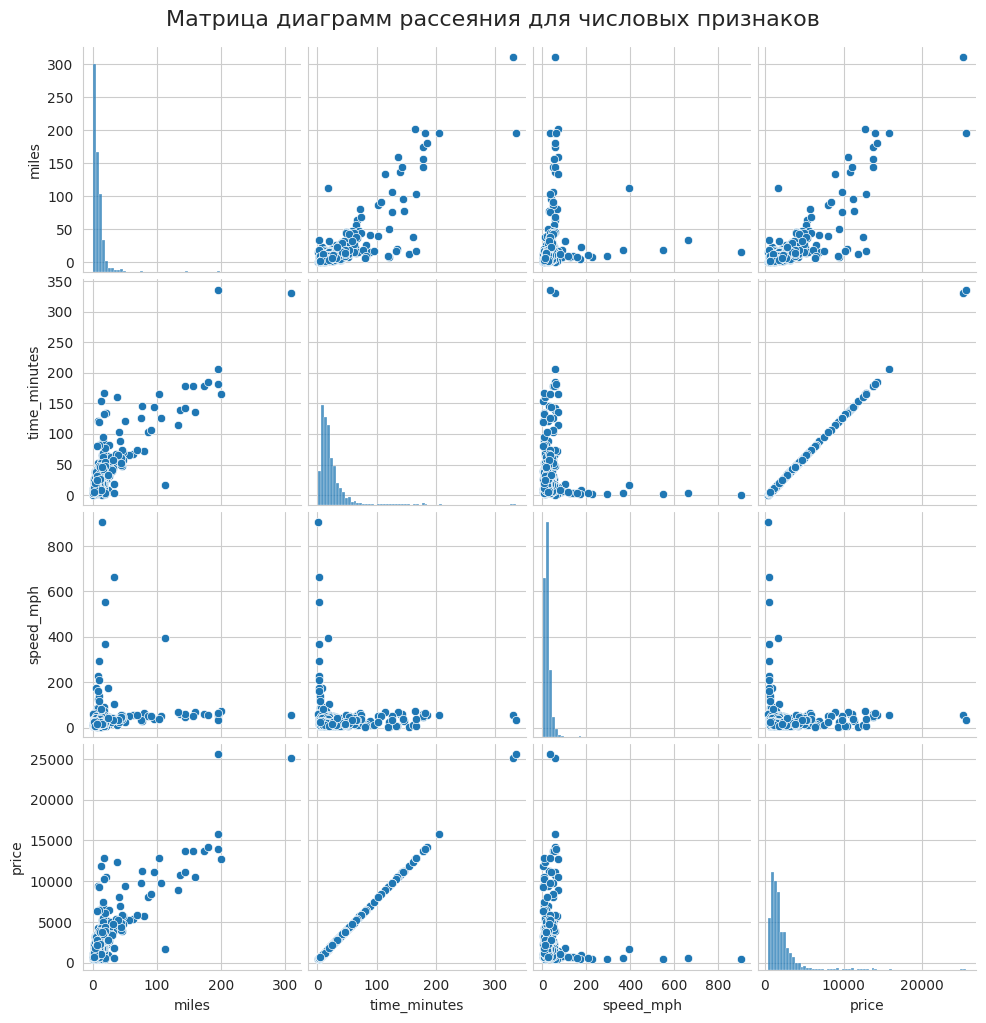

In [154]:
pairplot = sns.pairplot(df_cleaned[numerical_columns])
pairplot.fig.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02, fontsize=16)
plt.show()

Использовал sns.pairplot(), который автоматически создает матрицу scatter plots для всех комбинаций числовых переменных. Каждый график на пересечении строки и столбца отражает связь двух переменных, а диагональные гистограммы показывают распределение каждой переменной в отдельности.

Разберем отдельные графики:
- miles/time_minutes: Чем больше пробег, тем больше времени заняла поездка — положительная линейная связь, но с разбросом.
- miles/speed_mph: В основном, вне зависимости от пробега скорость остаётся в одном диапозоне
- miles/price: Чем больше пробег, тем больше цена
- time_minutes/speed_mph: При одной и той же скорости время может быть разное, что указывает на разницу в расстоянии.
- time_minutes/price: Чем дольше время, тем выше цена - линейная положительная связь.
- speed_mph/price: При одной и той же скорости, цена может сильно варьироваться.

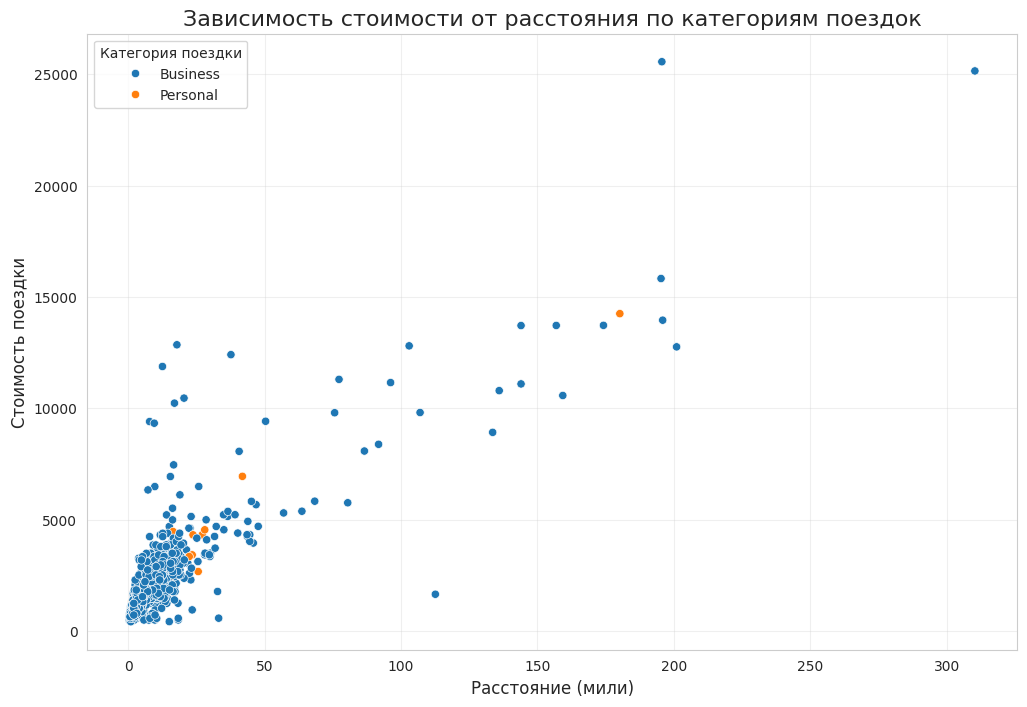

In [155]:
scatter_categorical = sns.scatterplot(data=df_cleaned, x='miles', y='price', hue='category')

plt.title('Зависимость стоимости от расстояния по категориям поездок', fontsize=16)
plt.xlabel('Расстояние (мили)', fontsize=12)
plt.ylabel('Стоимость поездки', fontsize=12)
plt.legend(title='Категория поездки')
plt.grid(True, alpha=0.3)

plt.show()

По графику можно сделать следующий анализ:
- Стоимость поездки в целом растёт с увеличением расстояния. Однако связь не строго линейная: есть значительный разброс, особенно на малых расстояниях.
- Business преобладают и при больших и при малых расстояниях.
- Personal сконцентрированы в основном при расстояниях до 50 миль.

## 3. Гистограммы

In [156]:
import numpy as np

In [157]:
def sturges_rule(n):
    return int(np.ceil(np.log2(n))) + 1

def rice_rule(n):
    return int(np.ceil(2 * n**(1/3)))

def scott_rule(data):
    """Правило Скотта для определения ширины бина"""
    return int(np.ceil((data.max() - data.min()) / (3.5 * data.std() / len(data)**(1/3))))

for col in numerical_columns:
    n = len(df_cleaned[col])
    sturges = sturges_rule(n)
    rice = rice_rule(n)
    scott = scott_rule(df_cleaned[col])
    
    print(f"\n{col}:")
    print(f"  Правило Стерджеса: {sturges} bins")
    print(f"  Правило Райса: {rice} bins")
    print(f"  Правило Скотта: {scott} bins")


miles:
  Правило Стерджеса: 12 bins
  Правило Райса: 21 bins
  Правило Скотта: 42 bins

time_minutes:
  Правило Стерджеса: 12 bins
  Правило Райса: 21 bins
  Правило Скотта: 36 bins

speed_mph:
  Правило Стерджеса: 12 bins
  Правило Райса: 21 bins
  Правило Скотта: 61 bins

price:
  Правило Стерджеса: 12 bins
  Правило Райса: 21 bins
  Правило Скотта: 36 bins


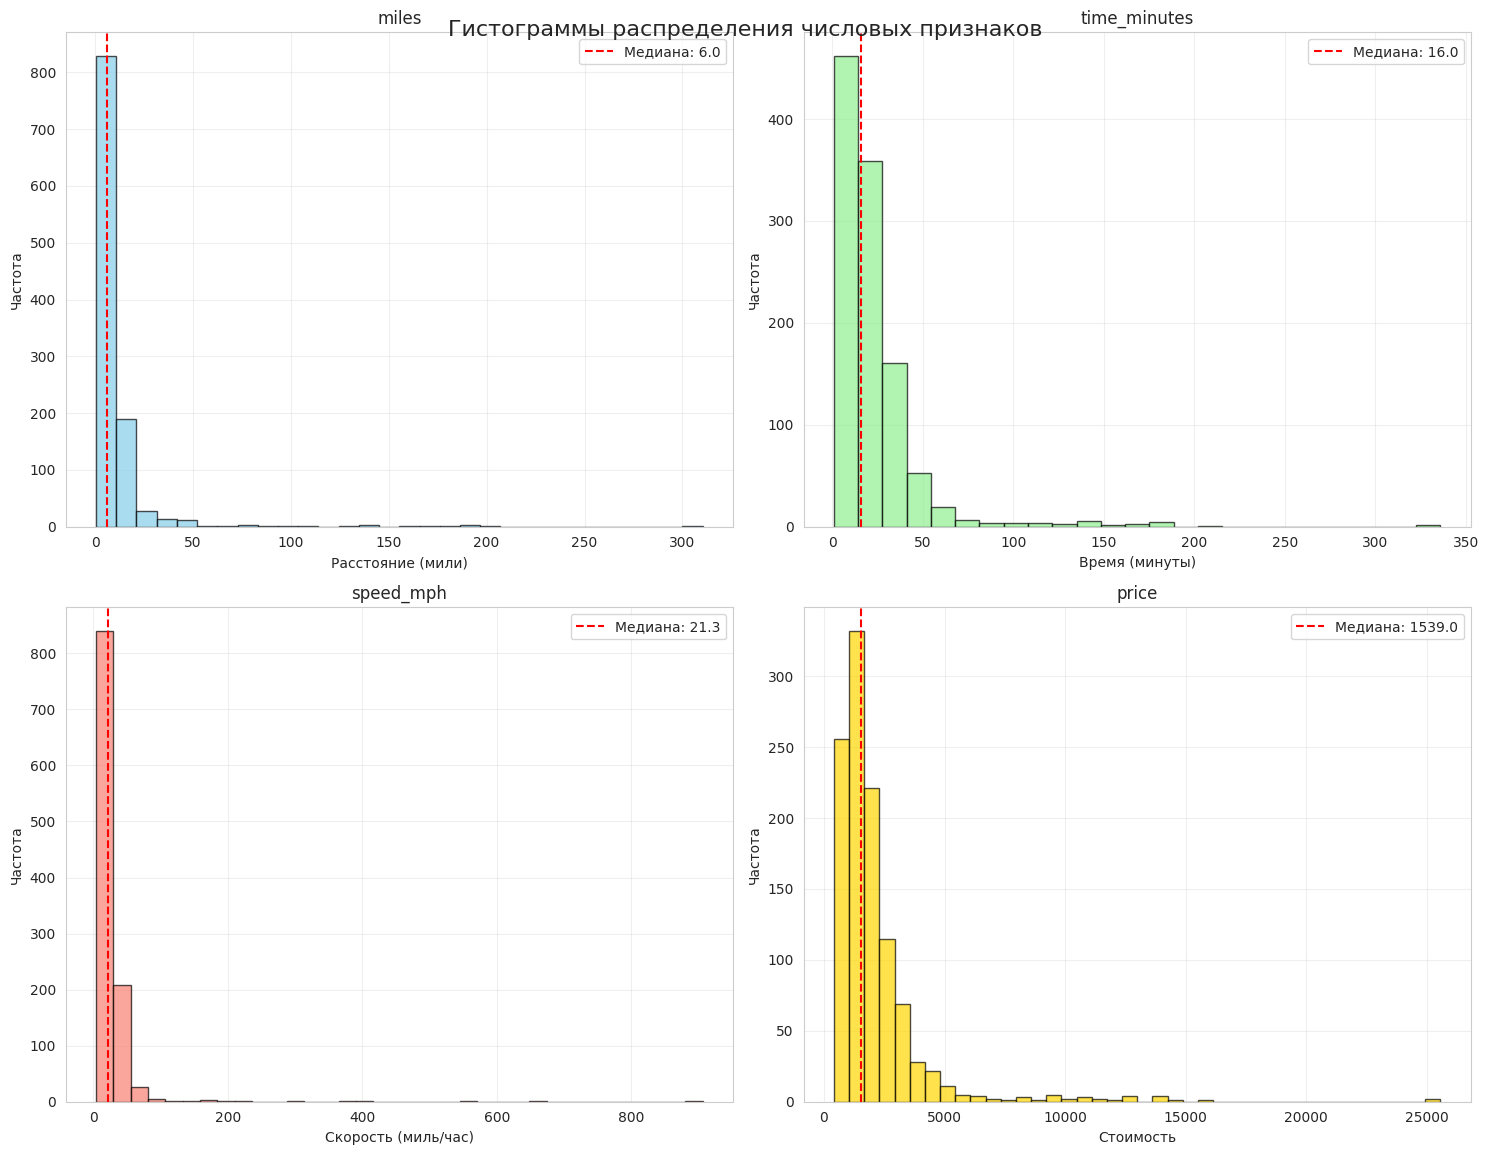

In [158]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Гистограммы распределения числовых признаков', fontsize=16, y=0.95)

# miles
axes[0,0].hist(df_cleaned['miles'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('miles')
axes[0,0].set_xlabel('Расстояние (мили)')
axes[0,0].set_ylabel('Частота')
axes[0,0].grid(True, alpha=0.3)

median_miles = df_cleaned['miles'].median()
axes[0,0].axvline(median_miles, color='red', linestyle='--', label=f'Медиана: {median_miles:.1f}')
axes[0,0].legend()

# time_minutes
axes[0,1].hist(df_cleaned['time_minutes'], bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('time_minutes')
axes[0,1].set_xlabel('Время (минуты)')
axes[0,1].set_ylabel('Частота')
axes[0,1].grid(True, alpha=0.3)

median_time = df_cleaned['time_minutes'].median()
axes[0,1].axvline(median_time, color='red', linestyle='--', label=f'Медиана: {median_time:.1f}')
axes[0,1].legend()

# speed_mph
axes[1,0].hist(df_cleaned['speed_mph'], bins=35, alpha=0.7, color='salmon', edgecolor='black')
axes[1,0].set_title('speed_mph')
axes[1,0].set_xlabel('Скорость (миль/час)')
axes[1,0].set_ylabel('Частота')
axes[1,0].grid(True, alpha=0.3)

median_speed = df_cleaned['speed_mph'].median()
axes[1,0].axvline(median_speed, color='red', linestyle='--', label=f'Медиана: {median_speed:.1f}')
axes[1,0].legend()

# price
axes[1,1].hist(df_cleaned['price'], bins=40, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('price')
axes[1,1].set_xlabel('Стоимость')
axes[1,1].set_ylabel('Частота')
axes[1,1].grid(True, alpha=0.3)

median_price = df_cleaned['price'].median()
axes[1,1].axvline(median_price, color='red', linestyle='--', label=f'Медиана: {median_price:.1f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

По каждой гистрограмме сделаем вывод:
- miles - Большинство поездок очень короткие (до 10 миль), распределение сильно скошено вправо — редкие длинные поездки тянут среднее вверх.
- time_minutes - Большинство поездок занимают до 20 минут, но есть длинный хвост — некоторые поездки длятся более 2 часа, что создаёт сильную асимметрию.
- speed_mph - Подавляющее большинство значений — около 0–50 миль/час, но есть аномально высокие скорости (до 800+), что указывает на выбросы или ошибки в данных.
- price - Цены в основном низкие (до 5000), но с длинным хвостом до 25 000 — медиана (~1539) гораздо ниже среднего, что характерно для скошенных ценовых данных.

## 4. Кореляция и ковариация

КОВАРИАЦИЯ:
- Покажает направление линейной зависимости между двумя переменными
- Положительная: переменные изменяются в одном направлении
- Отрицательная: переменные изменяются в противоположных направлениях
- Нулевая: отсутствие линейной зависимости
- НЕ нормализована: зависит от масштаба данных

КОРРЕЛЯЦИЯ (Пирсона):
- Нормализованная версия ковариации (от -1 до 1)
- Показывает силу и направление линейной зависимости
- -1: идеальная отрицательная линейная зависимость
- 0: отсутствие линейной зависимости  
- +1: идеальная положительная линейная зависимость
- Не зависит от масштаба данных

In [159]:
correlation_matrix = df_cleaned[numerical_columns].corr()
(correlation_matrix.round(3))

,miles,time_minutes,speed_mph,price
miles,1.000,0.850,0.193,0.851
time_minutes,0.850,1.000,0.005,1.000
speed_mph,0.193,0.005,1.000,0.006
price,0.851,1.000,0.006,1.000


In [160]:
covariance_matrix = df_cleaned[numerical_columns].cov()
(covariance_matrix.round(2))

,miles,time_minutes,speed_mph,price
miles,484.41,519.33,187.19,39056.47
time_minutes,519.33,770.65,6.17,57894.88
speed_mph,187.19,6.17,1950.08,520.41
price,39056.47,57894.88,520.41,4349328.76


**Корреляционная матрица** показывает наличие как ожидаемых, так и статистически аномальных зависимостей между числовыми признаками.

Наблюдается сильная положительная связь между расстоянием поездки (miles) и временем в пути (time_minutes) с коэффициентом корреляции r = 0.850, что логично отражает прямую зависимость: чем дольше длится поездка, тем большее расстояние преодолевает автомобиль.

Также выявлена сильная положительная корреляция между расстоянием (miles) и стоимостью поездки (price) с r = 0.851, что соответствует ожиданиям — более длинные поездки обычно стоят дороже.

Критическая аномалия обнаружена в паре время поездки-стоимость (time_minutes-price), где коэффициент корреляции составляет ровно 1.000. Такое значение статистически невозможно в реальных данных и указывает на либо ошибку в расчетах, либо на искусственную природу зависимости между этими переменными. В реальных условиях стоимость поездки зависит не только от времени, но и от множества других факторов.

Скорость движения (speed_mph) демонстрирует очень слабые связи со всеми остальными переменными (r < 0.20), что свидетельствует о ее независимом характере — скорость практически не линейно связана с расстоянием, временем или стоимостью поездки.

**Ковариационная матрица** подтверждает выявленные тенденции, однако интерпретировать абсолютные значения сложно из-за существенной разницы в масштабах переменных. Наибольшая ковариация наблюдается между временем и стоимостью поездки (57894.88), что дополнительно подтверждает аномальный характер их взаимосвязи. Высокая дисперсия стоимости (4349328.76) указывает на значительный разброс значений цены поездок в датасете.

#### Построение heatmap

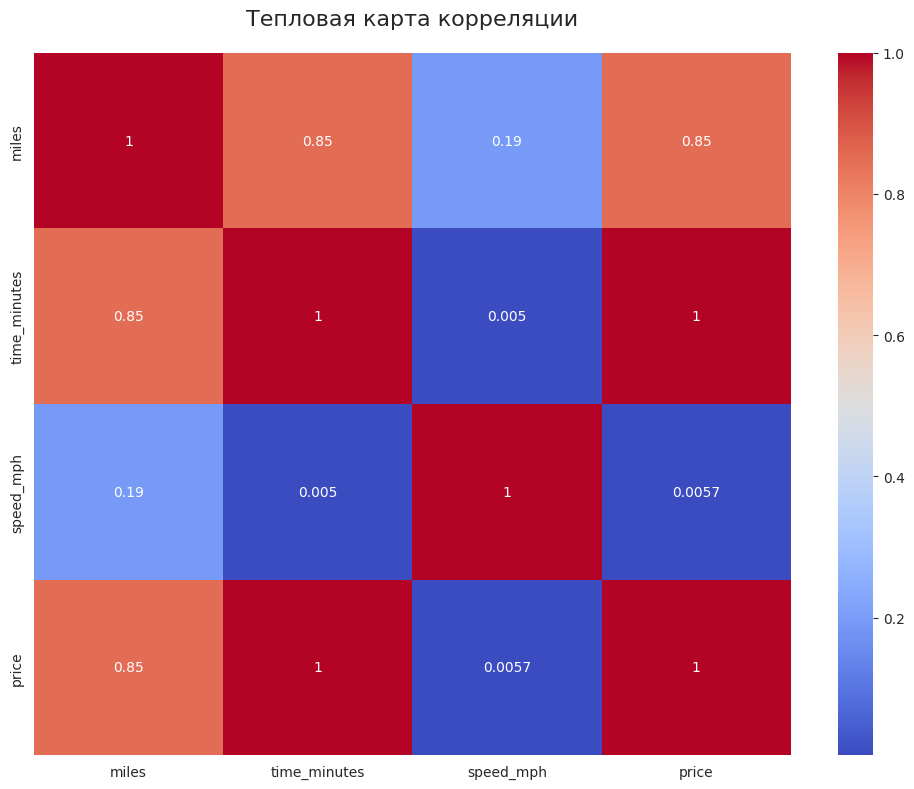

In [161]:
plt.figure(figsize=(10, 8))
heatmap_masked = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Используя тепловую карту кореляции, так же можно сделать выводы, описанные выше.

## 5. Выполнение индивидуальных заданий

### Задание 1

Использовать seaborn. По группировке - CATEGORY и среднее кол-во
пройденных миль по каждой цели маршрута - PURPOSE построить диаграмму

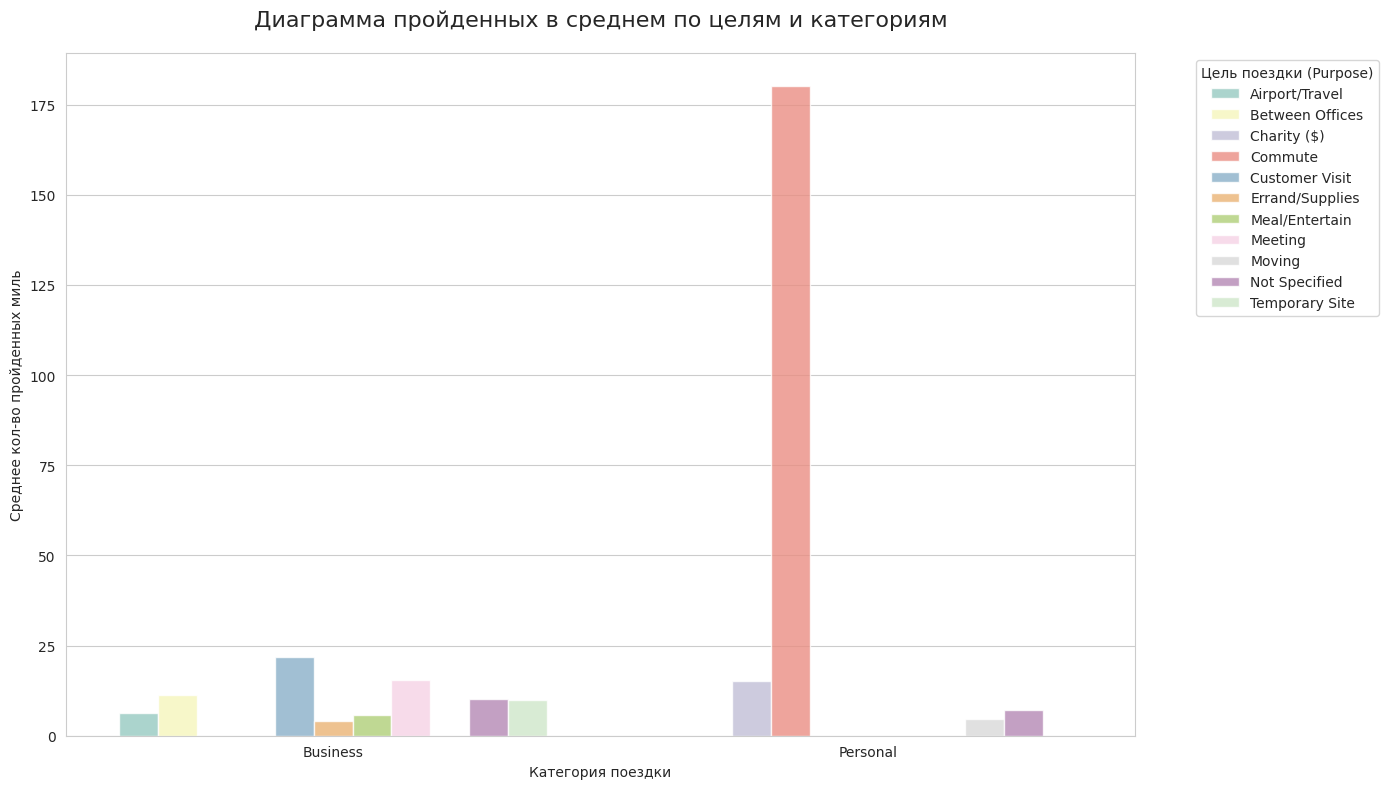

In [162]:
miles_by_purpose_category = df_cleaned.groupby(['purpose', 'category'], observed=True)['miles'].mean().reset_index()

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=miles_by_purpose_category,
                     x='category',           
                     y='miles',              
                     hue='purpose',          
                     palette='Set3',         
                     alpha=0.8)

plt.title('Диаграмма пройденных в среднем по целям и категориям', fontsize=16, pad=20)
plt.xlabel('Категория поездки')
plt.ylabel('Среднее кол-во пройденных миль')
plt.legend(title='Цель поездки (Purpose)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

При подготовке данных я использовал groupby() по двум колонкам - purpose и category, затем mean() для вычисления среднего значения miles. Это даёт нам структурированные данные для построения группированной диаграммы.

### Задание 2
Использовать pandas и plot. По сводной таблице (pivot_table) -
отобразить минимальную стоимость по каждой начальной точке поездки (START).
Отфильтровать сводную таблицу и оставить стоимость только выше 5000
Оставить только маркеры в виде ● черного цвета размером 16

<Figure size 1400x800 with 0 Axes>

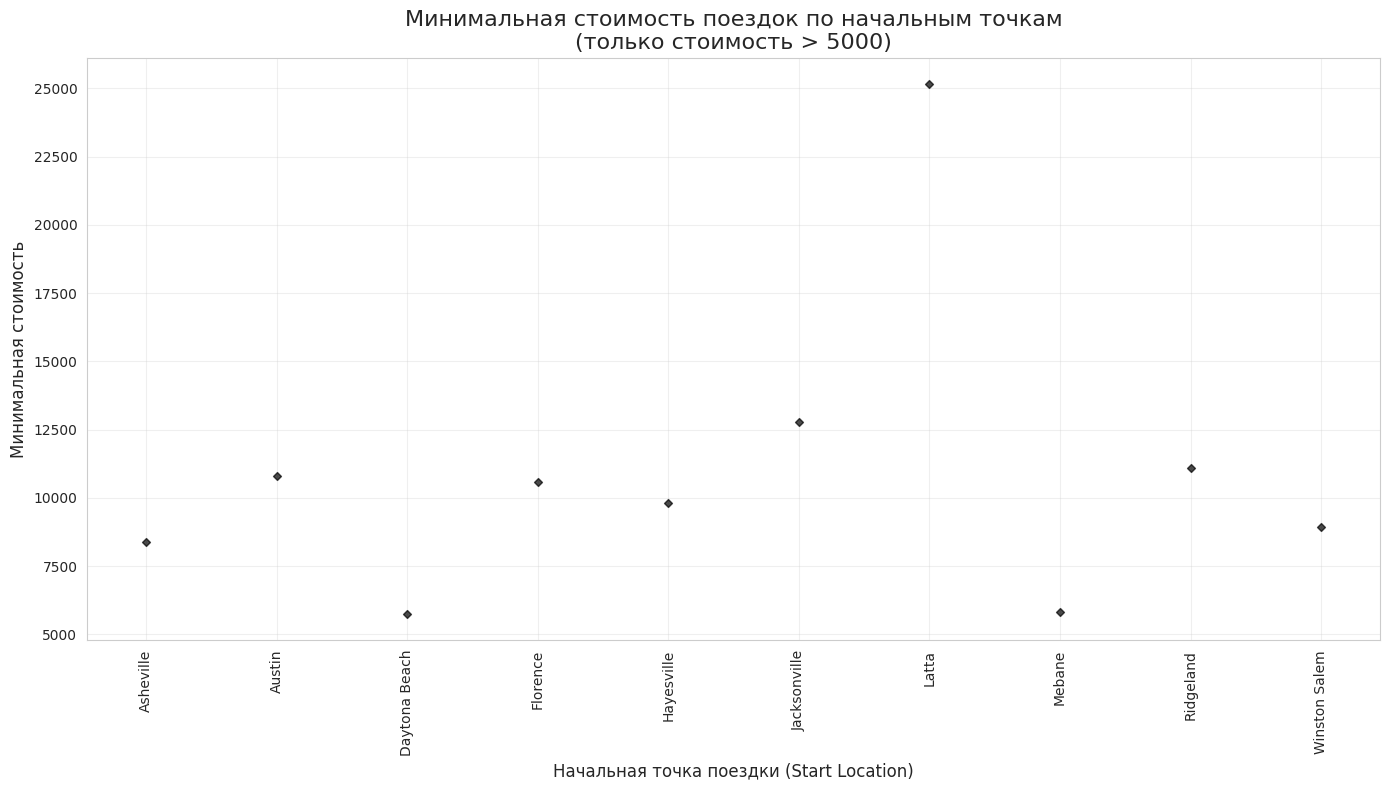

In [163]:
pivot_df = df_cleaned.pivot_table(
    values='price',
    index='start_location', 
    aggfunc='min'
).reset_index()

filtered_pivot = pivot_df[pivot_df['price'] > 5000].copy()

plt.figure(figsize=(14, 8))
ax = filtered_pivot.plot(
    x='start_location', 
    y='price', 
    kind='scatter',
    marker='D',           
    color='black',        
    s=16,                
    figsize=(14, 8),     
    alpha=0.7          
)

plt.title('Минимальная стоимость поездок по начальным точкам\n(только стоимость > 5000)', fontsize=16)
plt.xlabel('Начальная точка поездки (Start Location)', fontsize=12)
plt.ylabel('Минимальная стоимость', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

При подготовке данных я использовал pivot_table() с параметром aggfunc='min', который вычисляет минимальное значение стоимости для каждой стартовой локации. Метод reset_index() преобразует индекс обратно в колонку для удобства работы. Для фильтрации использовал булеву индексацию pivot_df['price'] > 5000. Метод copy() создает независимую копию данных для безопасного дальнейшего использования.

Для графика использовал plot() метод pandas DataFrame с параметром kind='scatter' для создания точечной диаграммы. Специфические параметры: marker='●' задает символ круга, color='black' - черный цвет, s=16 - размер маркера.


По графику видно, что у фильмов, выпущенных позже, меньшее количество голосов. Это объясняется тем, что прошло не так много времени, и картины не успели получить столько голосов, как более старые. Но в 2012 заметен скачок голосов. Скорее всего в этот год вышел очень популярный фильм, который собрал большое количество голосов за короткое время

### Задание 3 

Использовать matplotlib. Построить круговую диаграмму, которая
отображает процент по каждой категории поездки.

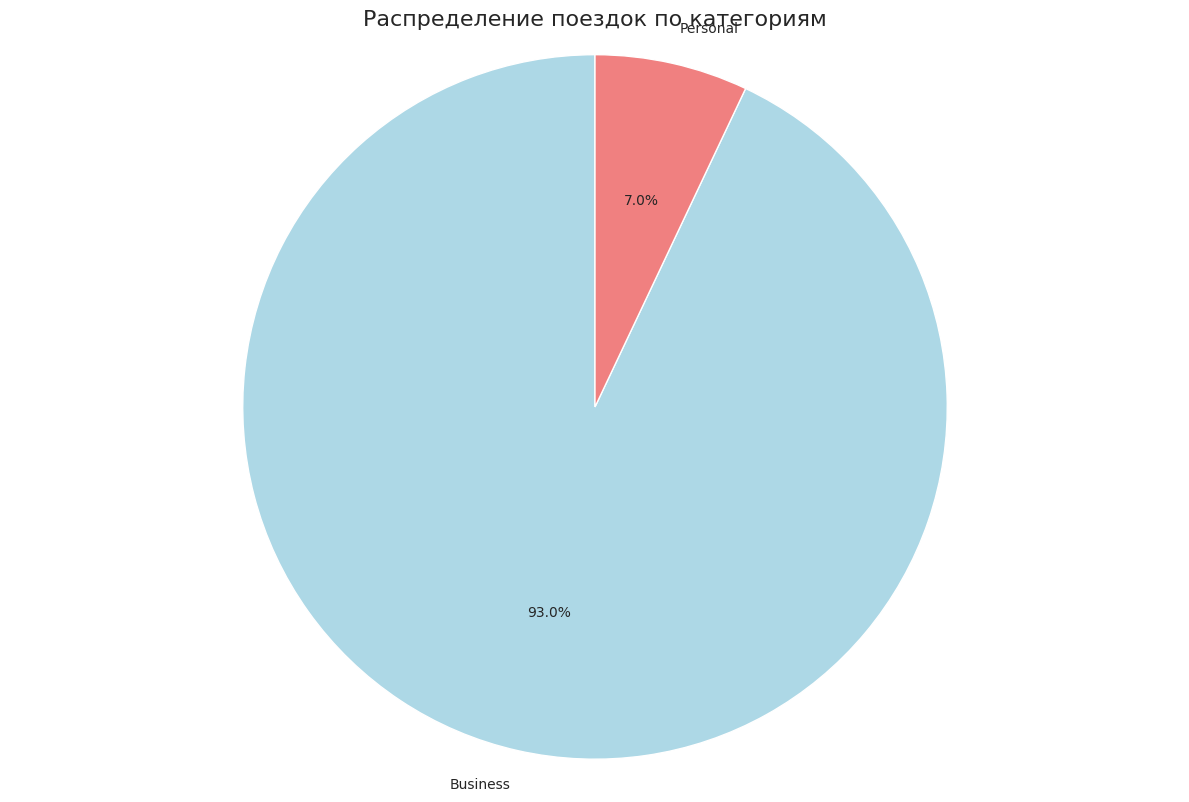

In [164]:
category_counts = df_cleaned['category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

plt.figure(figsize=(12, 8))
plt.pie(category_counts.values, 
        labels=category_counts.index,
        autopct='%1.1f%%',      # Формат отображения процентов
        startangle=90,          # Начальный угол
        colors=['lightblue', 'lightcoral'])
plt.title('Распределение поездок по категориям', fontsize=16)
plt.axis('equal')  # Обеспечиваем круглую форму диаграммы
plt.tight_layout()
plt.show()


Круговая диаграмма показывает распределение поездко по категориям: 93% поездок осуществлено по категории: Business, оставшиеся же 7% - в категории Personal

## 6. Гексагональный график

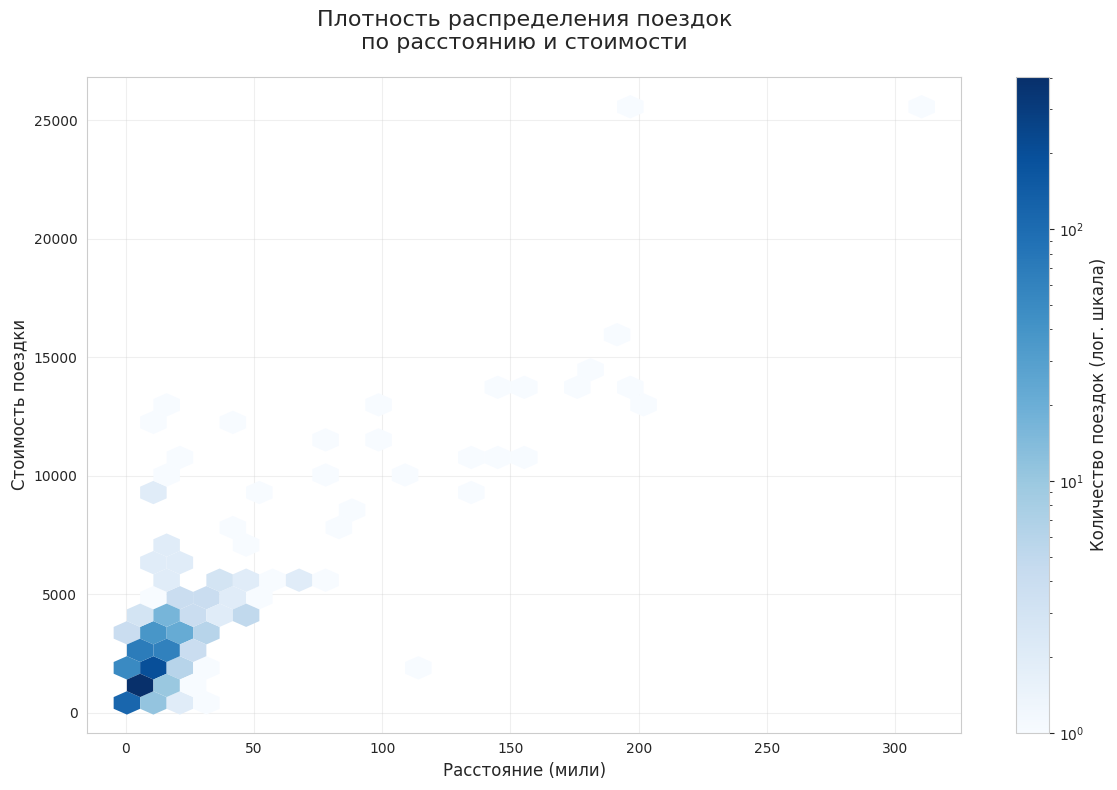

In [165]:
plt.figure(figsize=(12, 8))

hb = plt.hexbin(
    x=df_cleaned['miles'], 
    y=df_cleaned['price'],
    gridsize=30,           # Количество шестиугольников по каждой оси
    cmap='Blues',          
    bins='log',            # Логарифмическая шкала для лучшего отображения
    mincnt=1,              # Минимальное количество точек в bin
    edgecolors='none',     # Без границ у шестиугольников
    alpha=1             # Полупрозрачность
)

cb = plt.colorbar(hb, label='Количество поездок (лог. шкала)')
cb.set_label('Количество поездок (лог. шкала)', fontsize=12)

plt.xlabel('Расстояние (мили)', fontsize=12)
plt.ylabel('Стоимость поездки', fontsize=12)
plt.title('Плотность распределения поездок\nпо расстоянию и стоимости', 
          fontsize=16, pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Использовал plt.hexbin() для создания hexagonal binning plot. Параметр gridsize=30 определяет количество шестиугольников, cmap='Blues' задает цветовую схему, а bins='log' использует логарифмическую шкалу для лучшего отображения данных с большим разбросом.

На графике видно:
- C увеличением расстояния поездки растёт и её стоимость.
- Плотность поездок сконцентрирована в нижнем левом углу. Большинство поездок (самые тёмные шестиугольники — от 10² до 10³ по логарифмической шкале) приходятся на расстояние до 50 миль и стоимость до 5000 единиц. Это означает, что подавляющее большинство поездок — короткие и недорогие.

## 7. Карта размаха

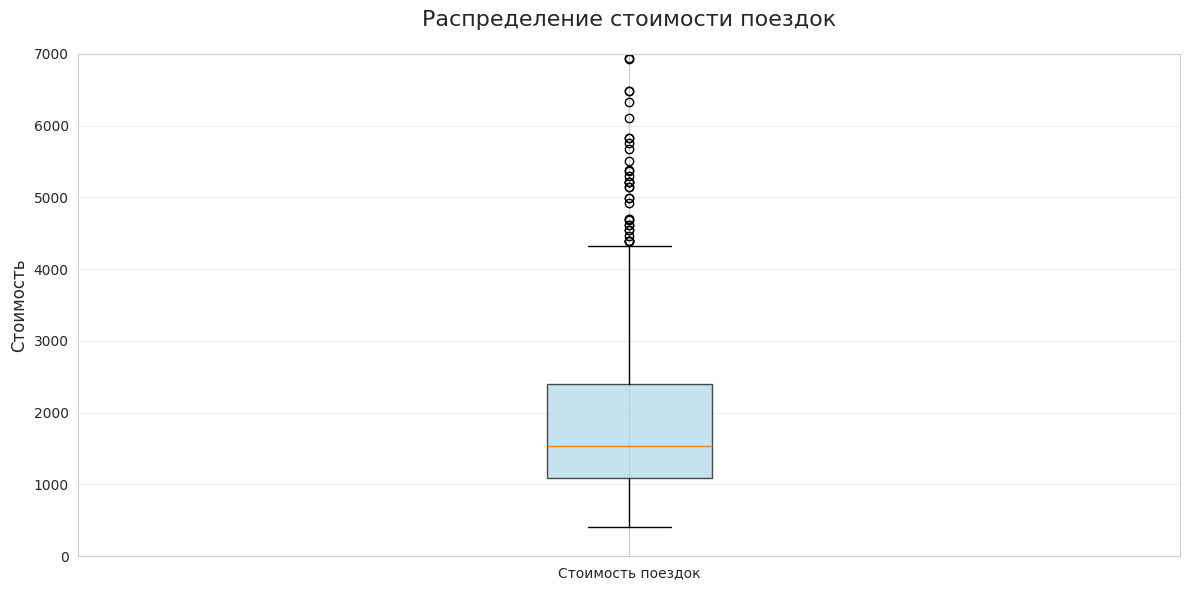

In [166]:
plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df_cleaned['price'], 
                      vert=True,
                      patch_artist=True,
                      tick_labels=['Стоимость поездок'])

colors = ['lightblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.ylabel('Стоимость', fontsize=12)
plt.ylim(0, 7000)
plt.title('Распределение стоимости поездок', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Можно сделать следующие выводы:   
* Медиана оценок находится на уровне ~1500.  
* Выбросы (точки справа от уса) — поездки со стоимостью около 5 тыс. и выше, скорее всего более продолжительны по времени.  
* Нижний ус заканчивается на ~400, что указывает на отсутствие поездкок с стоимостью ниже.

## 8. Boxplot по числовому столбцу, в котором заданы категории

In [167]:
price_stats = df_cleaned['price'].describe()

low_threshold = price_stats['25%']    # Ниже Q1 - низкая стоимость
medium_threshold = price_stats['75%'] # Выше Q3 - высокая стоимость

Использовал квартили распределения стоимости для определения границ категорий.

In [168]:
def categorize_price(price):
    if price < low_threshold:
        return 'Низкая стоимость'
    elif price <= medium_threshold:
        return 'Средняя стоимость'
    else:
        return 'Высокая стоимость'

df_cleaned['price_level'] = df_cleaned['price'].apply(categorize_price)

Использовал пользовательскую функцию categorize_price() с применением apply() для создания новой категориальной переменной. Это даёт нам три четко определенные группы стоимости.

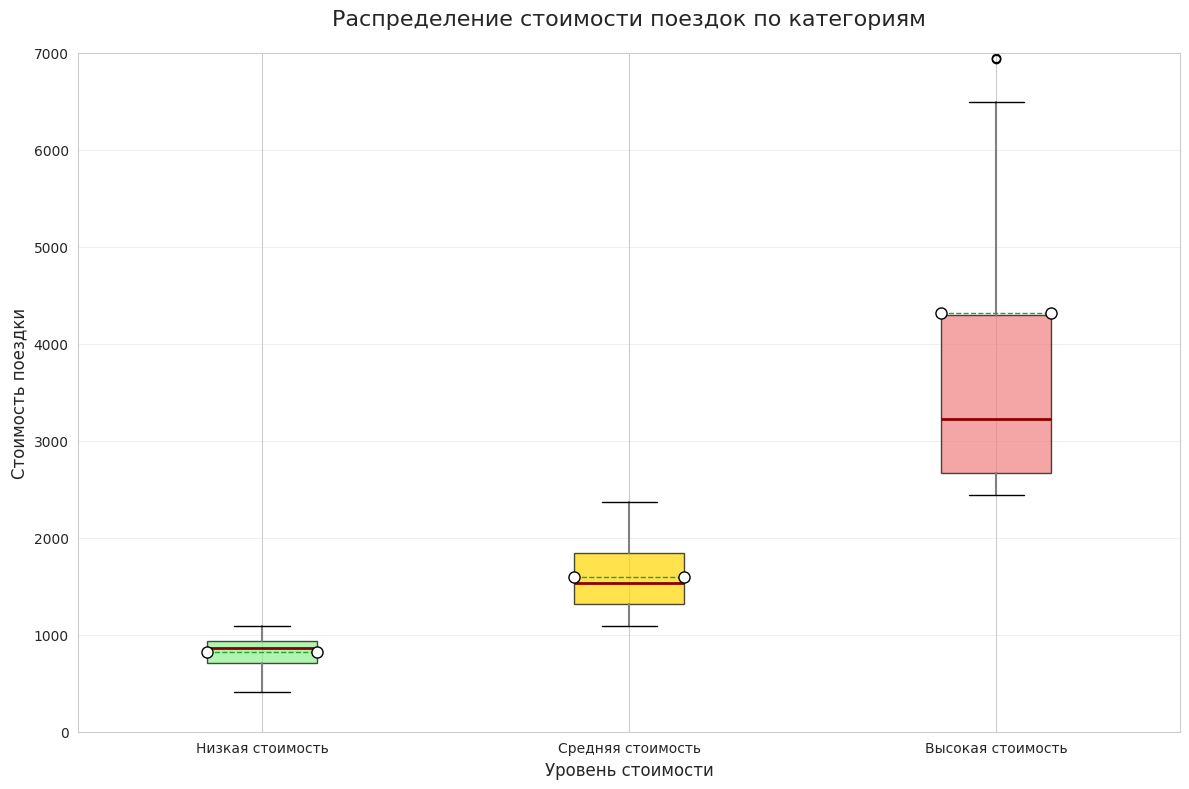

In [169]:
plt.figure(figsize=(12, 8))

price_levels = ['Низкая стоимость', 'Средняя стоимость', 'Высокая стоимость']
boxplot_data = [df_cleaned[df_cleaned['price_level'] == level]['price'] 
                for level in price_levels]
boxplot = plt.boxplot(boxplot_data,
                      tick_labels=price_levels,
                      patch_artist=True,
                      showmeans=True,  
                      meanline=True,   
                      showfliers=True, # Показываем выбросы
                      meanprops={'marker':'o', 'markerfacecolor':'white', 
                                'markeredgecolor':'black', 'markersize':8})

colors = ['lightgreen', 'gold', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Настраиваем усы (whiskers) и медианы
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.5)
for median in boxplot['medians']:
    median.set(color='darkred', linewidth=2)

plt.ylabel('Стоимость поездки', fontsize=12)
plt.xlabel('Уровень стоимости', fontsize=12)
plt.ylim(0, 7000)
plt.title('Распределение стоимости поездок по категориям', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

График показывает, что стоимость поездок значительно варьируется в зависимости от категории. Чем выше категория («Низкая», «Средняя», «Высокая»), тем выше и медианная, и максимальная стоимость поездок.

Детальный анализ по категориям:
1. Низкая стоимость. Медианная стоимость — примерно 800–900 рублей. Разброс небольшой, данные достаточно сконцентрированы вокруг медианы.
Видны единичные выбросы (точки вне усов), но они не сильно отклоняются от основного распределения.
2. Средняя стоимость. Диапазон — от ~1100 до ~2400 рублей. Разброс больше, чем в категории «Низкая», что говорит о большей вариативности цен. Также присутствуют отдельные выбросы.
3. Высокая стоимость. Медианная стоимость — примерно 3200–3300 рублей. Диапазон очень широкий — от ~2500 до ~25000 рублей. Самый большой разброс среди всех категорий — это говорит о том, что в этой группе встречаются как относительно доступные для категории поездки, так и очень дорогие.

## 9. Ещё Boxplot по каждому их двух столбцов

#### Boxplot с использованием Seaborn - Стоимость по категориям поездок

/tmp/ipykernel_35307/3828955069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


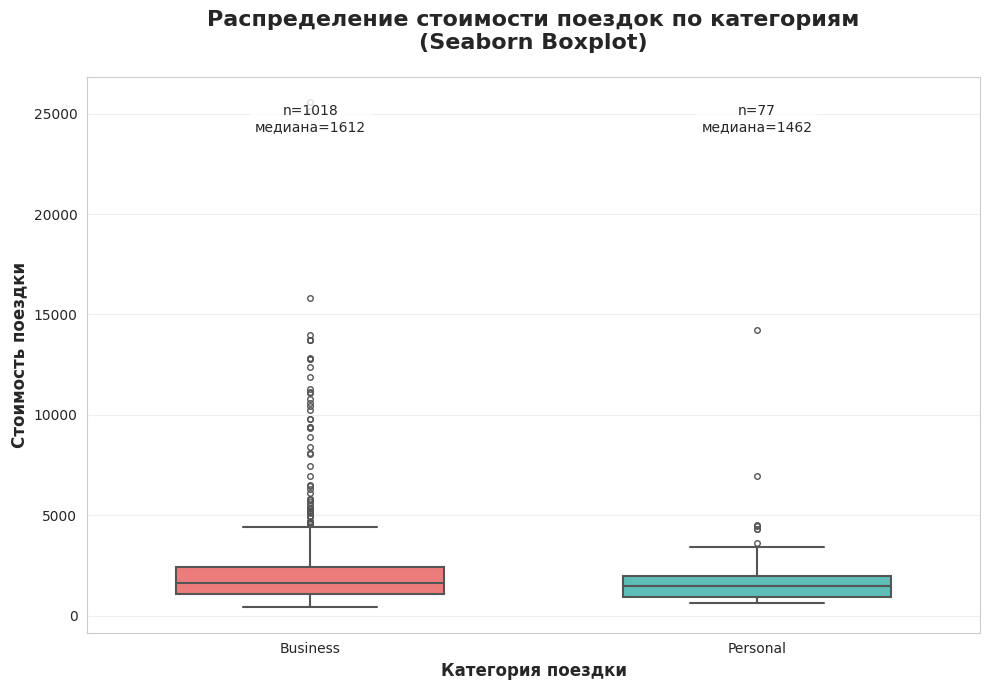

In [170]:
category_stats = df_cleaned.groupby('category', observed=True)['price'].describe()

plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df_cleaned,
    x='category',
    y='price',
    palette={'Business': '#FF6B6B', 'Personal': '#4ECDC4'},
    width=0.6,
    showfliers=True,
    fliersize=4,
    linewidth=1.5
)
plt.title('Распределение стоимости поездок по категориям\n(Seaborn Boxplot)', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Категория поездки', fontsize=12, fontweight='bold')
plt.ylabel('Стоимость поездки', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

categories = df_cleaned['category'].unique()
for i, category in enumerate(categories):
    count = len(df_cleaned[df_cleaned['category'] == category])
    median = df_cleaned[df_cleaned['category'] == category]['price'].median()
    plt.text(i, plt.ylim()[1] * 0.95, f'n={count}\nмедиана={median:.0f}', 
             ha='center', va='top', fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

Подготовка данных: Группируем данные по категориям и вычисляем описательную статистику.

Создание boxplot: \
sns.boxplot() - основная функция для построения
x='category' - категории по оси X
y='price' - стоимость по оси Y
palette - цветовое кодирование категорий
width=0.6 - ширина boxplot'ов для лучшего визуального восприятия
showfliers=True - отображение выбросов
fliersize=4 - размер точек выбросов

Оформление графика: \
Заголовок и подписи осей с настройкой шрифтов
Сетка для удобства чтения значений
Аннотации с количеством наблюдений и медианными значениями

#### Boxplot с использованием Matplotlib - Стоимость по уровням скорости

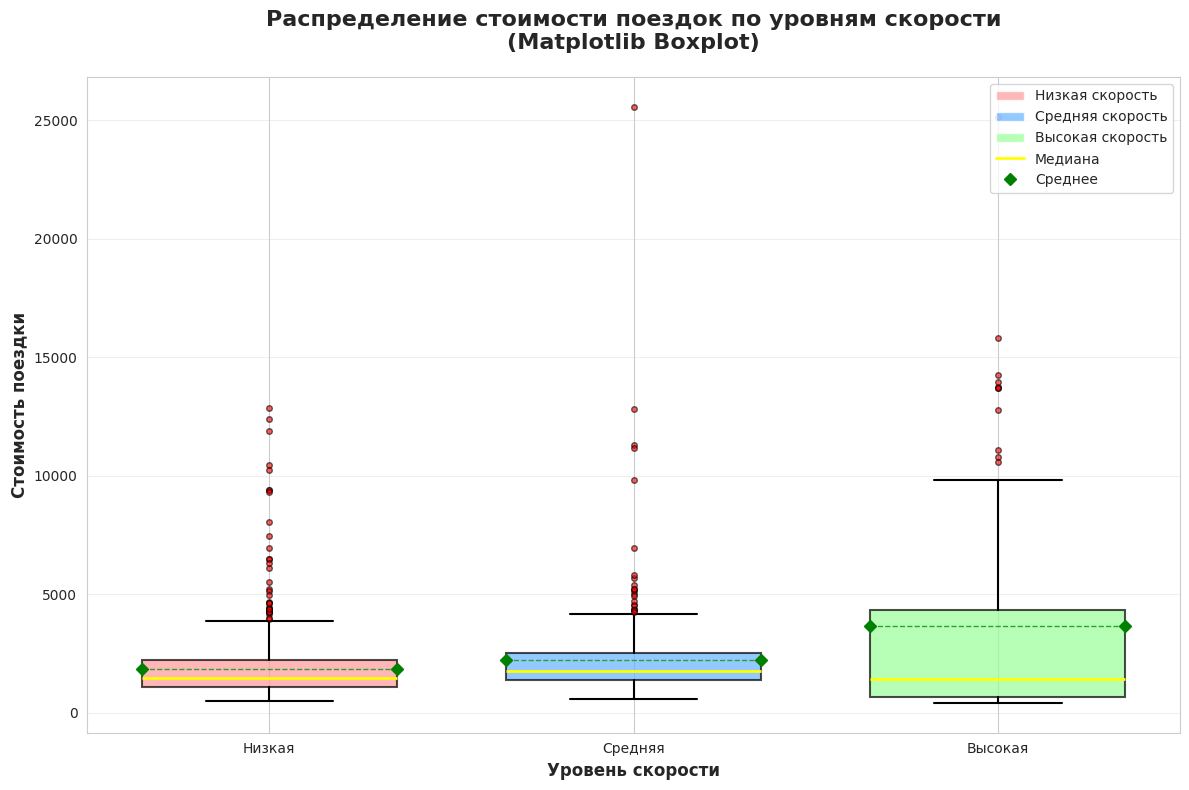

In [171]:
import matplotlib.pyplot as plt

df_cleaned['speed_level'] = pd.cut(
    df_cleaned['speed_mph'],
    bins=[0, 25, 45, float('inf')],
    labels=['Низкая', 'Средняя', 'Высокая']
)

speed_level_stats = df_cleaned['speed_level'].value_counts()


speed_levels = ['Низкая', 'Средняя', 'Высокая']
boxplot_data = [df_cleaned[df_cleaned['speed_level'] == level]['price'] 
                for level in speed_levels]


fig, ax = plt.subplots(figsize=(12, 8))
boxplot = ax.boxplot(
    boxplot_data,
    tick_labels=speed_levels,
    patch_artist=True,      # Включение заливки цветом
    showmeans=True,         # Показать средние значения
    meanline=True,          # Линия для среднего
    showfliers=True,        # Показать выбросы
    widths=0.7,             # Ширина boxplot'ов
    flierprops=dict(        # Свойства выбросов
        marker='o',
        markerfacecolor='red',
        markersize=4,
        alpha=0.6
    ),
    medianprops=dict(       # Свойства медианы
        color='yellow',
        linewidth=2
    ),
    meanprops=dict(         # Свойства среднего
        marker='D',
        markerfacecolor='green',
        markeredgecolor='green',
        markersize=6
    ),
    boxprops=dict(          # Свойства box'ов
        linewidth=1.5
    ),
    whiskerprops=dict(      # Свойства усов
        linewidth=1.5
    ),
    capprops=dict(          # Свойства ограничителей
        linewidth=1.5
    )
)

# Настройка цветов для каждого boxplot
colors = ['#FF9999', '#66B2FF', '#99FF99']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Распределение стоимости поездок по уровням скорости\n(Matplotlib Boxplot)', 
             fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Уровень скорости', fontsize=12, fontweight='bold')
ax.set_ylabel('Стоимость поездки', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[0], alpha=0.7, label='Низкая скорость'),
    Patch(facecolor=colors[1], alpha=0.7, label='Средняя скорость'),
    Patch(facecolor=colors[2], alpha=0.7, label='Высокая скорость'),
    plt.Line2D([0], [0], color='yellow', linewidth=2, label='Медиана'),
    plt.Line2D([0], [0], marker='D', color='green', linestyle='None', 
              markersize=6, label='Среднее')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

Подготовка данных аналогично первому способу.

Настройка настройка boxplot: \
patch_artist=True - позволяет настроить заливку цветом
showmeans=True и meanline=True - отображение средних значений

Индивидуальные свойства для каждого элемента:
flierprops - настройка выбросов
medianprops - настройка медианы
meanprops - настройка среднего значения
boxprops, whiskerprops, capprops - стили основных элементов

## 10. Вывод

В ходе проведённой работы был выполнен комплексный анализ датасета, содержащего информацию о 1099 поездках, включая расстояние, продолжительность, скорость, стоимость, цель поездки и географические точки отправления и назначения. Данные представлены в смешанных типах (строковые и числовые), и в процессе работы были выявлены, обработаны и интерпретированы ключевые особенности как количественных, так и качественных признаков.

Одной из главных проблем исходных данных стало наличие 501 пропуска в столбце **цели поездки (purpose)** — почти в половине наблюдений. Учитывая объём пропущенных значений, их удаление было бы нецелесообразно, так как привело бы к потере почти 50 % информации. Вместо этого пропуски были заменены на метку **«Цель не указана»**, что позволило сохранить полноту выборки и избежать искажений при последующем анализе. При этом было подтверждено отсутствие опечаток и дубликатов в категориальных данных, за исключением одной очевидной ошибки в названии локации — «r?walpindi», которая была исправлена на **Rawalpindi** на основе внешних источников.

В числовых признаках выявлены как закономерные тенденции, так и аномалии. Большинство поездок короткие: медианное расстояние — **6 миль**, а 75 % поездок не превышают **10,5 миль**. Аналогично, медианная продолжительность — **16 минут**, при этом наблюдается длинный правый хвост распределения: отдельные поездки длятся более **5,5 часов**. Стоимость также сильно скошена вправо: медиана — **1539 рублей**, но среднее значение — **2086 рублей**, что обусловлено наличием дорогих выбросов (до **25 569 рублей**). Это указывает на то, что датасет в основном отражает повседневные, недорогие поездки, но включает и редкие, но значимые случаи — например, междугородние или премиальные заказы.

Особое внимание было уделено обработке аномальных значений. В четырёх строках (0,36 % выборки) скорость оказалась бесконечной — это следствие деления ненулевого расстояния на нулевое время, что физически невозможно и указывает на ошибку в данных. Поскольку такие значения искажают статистику и не поддаются осмысленной импутации, они были удалены, что не повлияло на репрезентативность выборки.

В ходе визуального и статистического анализа подтверждена сильная положительная связь между расстоянием и временем (**r = 0,85**) и между расстоянием и стоимостью (**r = 0,85**), что соответствует логике ценообразования в транспортных сервисах. Однако обнаружена критическая аномалия: корреляция между временем и стоимостью составила **ровно 1,0**, что в реальных условиях невозможно и, вероятно, свидетельствует о том, что стоимость в некоторых записях была искусственно рассчитана только на основе времени, без учёта других факторов. Это требует дополнительной проверки логики формирования цены в исходной системе.

Графический анализ (включая гистограммы, hexbin-графики и boxplot’ы) наглядно продемонстрировал, что подавляющее большинство поездок сосредоточено в диапазоне до **50 миль** и до **5000 рублей**, а распределения всех числовых признаков характеризуются выраженной правосторонней асимметрией. Разделение поездок на категории («Низкая», «Средняя», «Высокая» стоимость) подтвердило качественное различие между группами: медианная цена в высокой категории (~3300 рублей) более чем в три раза превышает медиану низкой (~850 рублей), при этом разброс в высокой категории значительно шире, что отражает большую неоднородность дорогих поездок.

Также была проведена техническая подготовка данных: приведение названий столбцов к единому стилю **snake_case**, преобразование временных меток в тип **datetime64[ns]**, а категориальных переменных — в тип **category** для повышения эффективности хранения и анализа. Дубликатов обнаружено не было.

В целом, работа показала, что датасет представляет собой реалистичную, но неидеальную выборку поездок, в которой доминируют короткие и недорогие заказы, но присутствуют и экстремальные случаи, требующие осторожной интерпретации. Выявленные аномалии (пропуски, бесконечные скорости, подозрительная корреляция) были корректно обработаны, что повысило качество данных и надёжность последующих выводов. Результаты анализа могут быть использованы для сегментации клиентов, оптимизации тарифов или выявления аномального поведения в системе заказа транспорта.